In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression


In [3]:
dataset = pd.read_csv('50_Startups.csv')

In [65]:
dataset.head(50)

,R&D Spend,Administration,Marketing Spend,Profit,New York,California,Florida
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1
5,131876.90,99814.71,362861.36,156991.12,1,0,0
6,134615.46,147198.87,127716.82,156122.51,0,1,0
7,130298.13,145530.06,323876.68,155752.60,0,0,1
8,120542.52,148718.95,311613.29,152211.77,1,0,0
9,123334.88,108679.17,304981.62,149759.96,0,1,0


In [4]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


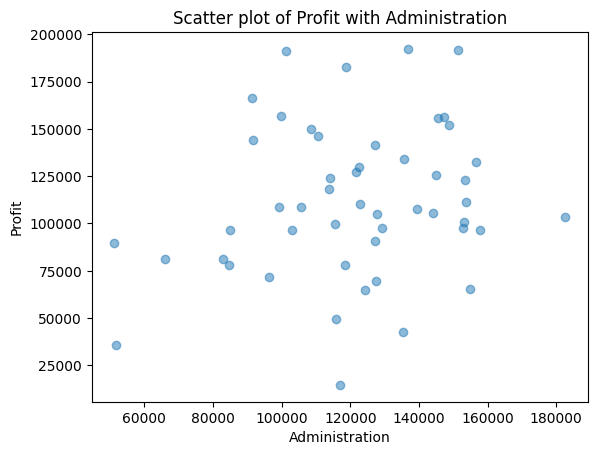

In [5]:
plt.scatter(dataset['Administration'], dataset['Profit'], alpha=0.5)
plt.title('Scatter plot of Profit with Administration')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()

<AxesSubplot: >

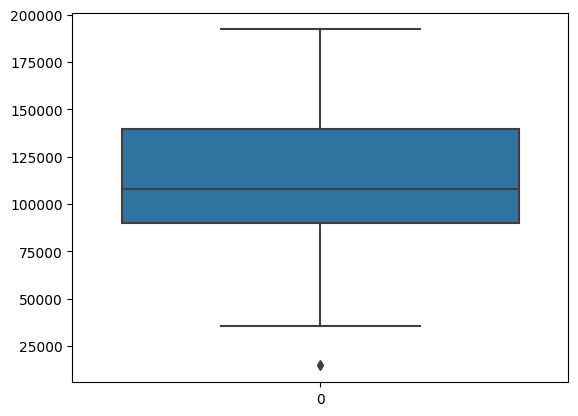

In [6]:
sns.boxplot(dataset['Profit'])

In [7]:
dataset.describe(include = 'all')

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50,50.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,New York,NaN
freq,NaN,NaN,NaN,17,NaN
mean,73721.615600,121344.639600,211025.097800,NaN,112012.639200
std,45902.256482,28017.802755,122290.310726,NaN,40306.180338
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,39936.370000,103730.875000,129300.132500,NaN,90138.902500
50%,73051.080000,122699.795000,212716.240000,NaN,107978.190000
75%,101602.800000,144842.180000,299469.085000,NaN,139765.977500


In [8]:
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [9]:
dataset['New York'] = np.where(dataset['State']=='New York',1,0)

In [10]:
dataset['California'] = np.where(dataset['State']=='California',1,0)

In [11]:
dataset['Florida'] = np.where(dataset['State']=='Florida',1,0)
dataset.drop(columns='State',axis=1,inplace=True)

In [12]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,New York,California,Florida
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [13]:
dependent_variable = 'Profit'

In [14]:
Independent_variable = list(set(dataset.columns.tolist()) - {dependent_variable})

In [15]:
Independent_variable 

['California',
 'Administration',
 'New York',
 'R&D Spend',
 'Florida',
 'Marketing Spend']

In [16]:
x = dataset[Independent_variable].values

In [17]:
y = dataset[dependent_variable].values

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=0)  

In [19]:
x_train.shape

(40, 6)

In [20]:
x_test.shape

(10, 6)

In [21]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [22]:
x_train[1:10]

array([[0.        , 0.3173015 , 1.        , 0.2782839 , 0.        ,
        0.43561799],
       [0.        , 0.87258866, 0.        , 0.45557444, 1.        ,
        0.28413435],
       [1.        , 1.        , 0.        , 0.2807759 , 0.        ,
        0.44680961],
       [0.        , 0.59103645, 0.        , 0.55488118, 1.        ,
        0.62511553],
       [0.        , 0.88568959, 0.        , 0.7880179 , 1.        ,
        0.68649342],
       [0.        , 0.98922572, 0.        , 0.72539353, 1.        ,
        0.54370828],
       [0.        , 0.6847981 , 1.        , 0.0060492 , 0.        ,
        0.0040356 ],
       [0.        , 0.00432296, 1.        , 0.00327821, 0.        ,
        0.        ],
       [0.        , 0.95618996, 1.        , 0.39676926, 0.        ,
        0.22709197]])

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBRegressor
from xgboost import XGBRFClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
import lightgbm as lgb
#from sklearn.tree import export_graphviz

In [24]:
# To remove Multicollinearity, using VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [25]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Profit'] ]])

,variables,VIF
0,R&D Spend,2.495511
1,Administration,1.177766
2,Marketing Spend,2.416797
3,New York,9.222969
4,California,9.044052
5,Florida,9.443578


<AxesSubplot: >

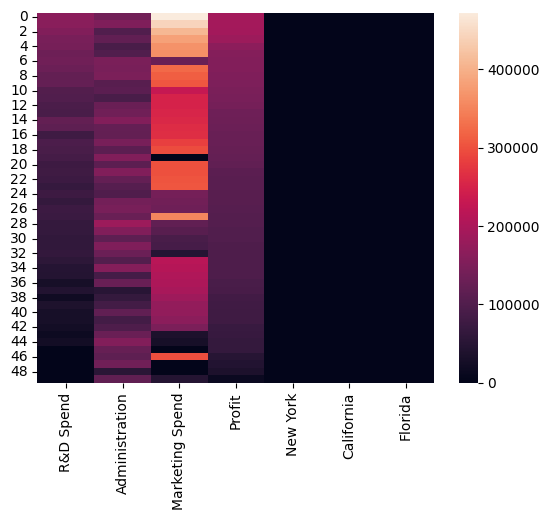

In [26]:
sns.heatmap(dataset)

In [27]:
MSE=[]
RMSE=[]
R2=[]
Adj_R2=[]


In [28]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [29]:
pred_train_lr = regressor.predict(x_train)

In [30]:
print(np.sqrt(mean_squared_error(y_train,pred_train_lr)))

9031.66661257897


In [38]:
from sklearn.metrics import r2_score
import math

In [39]:
MSE_lr = mean_squared_error(y_test, pred_test_lr)
MSE.append(MSE_lr)

RMSE_lr = math.sqrt(mean_squared_error(y_test, pred_test_lr))
RMSE.append(RMSE_lr)

R2_lr = r2_score(y_test, pred_test_lr)
R2.append(R2_lr)

adj_r2_lr =1-(1-r2_score(y_test,pred_test_lr))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
Adj_R2.append(adj_r2_lr)

print(f"MSE:{MSE_lr},RMSE:{RMSE_lr},R2:{R2_lr},Adj_R2:{adj_r2_lr}")

MSE:83502864.03257725,RMSE:9137.990152794937,R2:0.9347068473282426,Adj_R2:0.8041205419847278


In [33]:
print(r2_score(y_train,pred_train_lr))

0.9501847627493607


In [34]:
pred_test_lr=regressor.predict(x_test)

In [35]:
print(np.sqrt(mean_squared_error(y_test,pred_test_lr)))

9137.990152794937


In [36]:
print(r2_score(y_test,pred_test_lr))

0.9347068473282426


## Ridge Regression

In [40]:
from sklearn.linear_model import Ridge

In [41]:
rr = Ridge(alpha=0.01)

In [42]:
rr.fit(x_train,y_train)
pred_train_rr = rr.predict(x_train) 
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))


9033.188175710795


In [43]:
print(r2_score(y_train,pred_train_rr))

0.9501679766086824


In [44]:
pred_test_rr=rr.predict(x_test)

In [45]:
print(np.sqrt(mean_squared_error(y_test,pred_test_rr)))

9246.784509552388


In [46]:
print(r2_score(y_test,pred_test_rr))

0.9331428682197209


In [47]:
MSE_rr = mean_squared_error(y_test, pred_test_rr)
MSE.append(MSE_rr)

RMSE_rr = math.sqrt(mean_squared_error(y_test, pred_test_rr))
RMSE.append(RMSE_rr)

R2_rr = r2_score(y_test, pred_test_rr)
R2.append(R2_rr)

adj_r2_rr =1-(1-r2_score(y_test,pred_test_rr))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
Adj_R2.append(adj_r2_rr)

print(f"MSE:{MSE_rr},RMSE:{RMSE_rr},R2:{R2_rr},Adj_R2:{adj_r2_rr}")

MSE:85503023.766098,RMSE:9246.784509552388,R2:0.9331428682197209,Adj_R2:0.7994286046591628


## Lasso Regression

In [48]:
lasso = Lasso(alpha=0.01)
lasso.fit(x_train,y_train)
y_pred_lasso = lasso.predict(x_test)

C:\Users\Jeet Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.254e+07, tolerance: 6.550e+06
  model = cd_fast.enet_coordinate_descent(


In [49]:
print(np.sqrt(mean_squared_error(y_test,y_pred_lasso)))
print(r2_score(y_test,y_pred_lasso))

9137.938985400446
0.9347075785330461


In [50]:
MSE_lasso = mean_squared_error(y_test, y_pred_lasso)
MSE.append(MSE_lasso)

RMSE_lasso = math.sqrt(mean_squared_error(y_test,  y_pred_lasso))
RMSE.append(RMSE_lasso)

R2_lasso = r2_score(y_test,  y_pred_lasso)
R2.append(R2_lasso)

adj_r2_lasso =1-(1-r2_score(y_test, y_pred_lasso))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
Adj_R2.append(adj_r2_lasso)

print(f"MSE:{MSE_lasso},RMSE:{RMSE_lasso},R2:{R2_lasso},Adj_R2:{adj_r2_lasso}")

MSE:83501928.90090132,RMSE:9137.938985400446,R2:0.9347075785330461,Adj_R2:0.8041227355991383


Decision Tree Regressor

In [51]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
y_pred_dtr = dtr.predict(x_test)

In [52]:
print(np.sqrt(mean_squared_error(y_test,y_pred_lasso)))
print(r2_score(y_test,y_pred_dtr))

9137.938985400446
0.976492539113495


In [53]:
MSE_dtr = mean_squared_error(y_test, y_pred_dtr)
MSE.append(MSE_dtr)

RMSE_dtr = math.sqrt(mean_squared_error(y_test, y_pred_dtr))
RMSE.append(RMSE_dtr)

R2_dtr = r2_score(y_test, y_pred_dtr)
R2.append(R2_dtr)

adj_r2_dtr =1-(1-r2_score(y_test,y_pred_dtr))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
Adj_R2.append(adj_r2_dtr)

print(f"MSE:{MSE_dtr},RMSE:{RMSE_dtr},R2:{R2_dtr},Adj_R2:{adj_r2_dtr}")

MSE:30063494.100600064,RMSE:5483.018703287456,R2:0.976492539113495,Adj_R2:0.929477617340485


random forest

In [54]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)

In [55]:
print(np.sqrt(mean_squared_error(y_test,y_pred_lasso)))
print(r2_score(y_test,y_pred_rf))

9137.938985400446
0.9657585624467901


In [56]:
MSE_rf = mean_squared_error(y_test, y_pred_rf)
MSE.append(MSE_rf)

RMSE_rf = math.sqrt(mean_squared_error(y_test, y_pred_rf))
RMSE.append(RMSE_rf)

R2_rf = r2_score(y_test, y_pred_rf)
R2.append(R2_rf)

adj_r2_rf =1-(1-r2_score(y_test,y_pred_rf))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
Adj_R2.append(adj_r2_rf)

print(f"MSE:{MSE_rf},RMSE:{RMSE_rf},R2:{R2_rf},Adj_R2:{adj_r2_rf}")

MSE:43791086.619140044,RMSE:6617.48340527878,R2:0.9657585624467901,Adj_R2:0.8972756873403704


In [57]:
xgb = XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [58]:
y_pred_xgb = xgb.predict(x_test)

In [59]:
print(np.sqrt(mean_squared_error(y_test,y_pred_lasso)))
print(r2_score(y_test,y_pred_xgb))

9137.938985400446
0.9305067980987579


In [60]:
from sklearn.metrics import mean_squared_error
import math

In [61]:
MSE_xgb = mean_squared_error(y_test, y_pred_xgb)
MSE.append(MSE_xgb)

RMSE_xgb = math.sqrt(mean_squared_error(y_test, y_pred_xgb))
RMSE.append(RMSE_xgb)

R2_xgb = r2_score(y_test, y_pred_xgb)
R2.append(R2_xgb)

adj_r2_xgb =1-(1-r2_score(y_test,y_pred_xgb))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
Adj_R2.append(adj_r2_xgb)

print(f"MSE:{MSE_xgb},RMSE:{RMSE_xgb},R2:{R2_xgb},Adj_R2:{adj_r2_xgb}")

MSE:88874271.68236431,RMSE:9427.315189509913,R2:0.9305067980987579,Adj_R2:0.7915203942962737


In [62]:
#dataset.columns

In [64]:
import pickle
pickle.dump(dataset,open('dataset.pkl','wb'))
pickle.dump(dtr,open('dtr.pkl', 'wb'))